In [12]:
import os
import keras
from keras.applications import inception_v3
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Using Inception

In [13]:
pretrained_inception = inception_v3.InceptionV3()

In [17]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inception_v3.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

40960/35363 [==================================] - 0s 1us/step
('n02113712', 'miniature_poodle', 0.23822299)
('n02113799', 'standard_poodle', 0.15735732)
('n02091635', 'otterhound', 0.1461949)
('n02096051', 'Airedale', 0.045699287)
('n02102318', 'cocker_spaniel', 0.029833842)


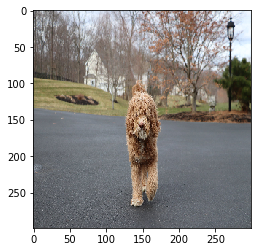

In [18]:
images = transform_img_fn([os.path.join('data','labradoodle.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = pretrained_inception.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

# Explanation from LIME

In [20]:
import lime
from lime import lime_image

/Users/anirudh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/anirudh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/anirudh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/anirudh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [21]:
explainer = lime_image.LimeImageExplainer()

In [23]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], pretrained_inception.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 12min 13s, sys: 2min 6s, total: 14min 20s
Wall time: 2min 16s


## Visualize the explanation

In [24]:
from skimage.segmentation import mark_boundaries

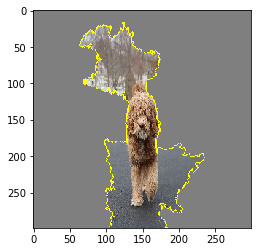

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

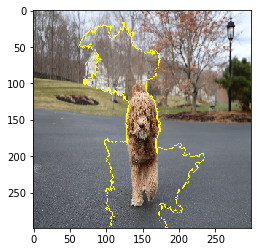

In [26]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

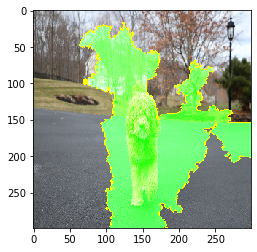

In [27]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

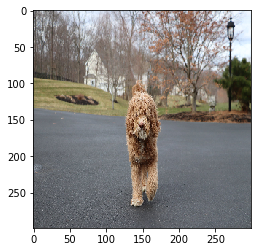

In [28]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Example 2

('n02112350', 'keeshond', 0.6853619)
('n02120079', 'Arctic_fox', 0.042144347)
('n02110063', 'malamute', 0.015486542)
('n02091467', 'Norwegian_elkhound', 0.013821518)
('n02112018', 'Pomeranian', 0.010111778)


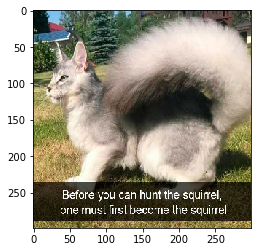

In [34]:
images = transform_img_fn([os.path.join('data','cat_squirrel.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = pretrained_inception.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [37]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], pretrained_inception.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 12min 10s, sys: 2min 8s, total: 14min 18s
Wall time: 2min 10s


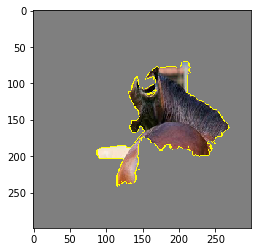

In [38]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

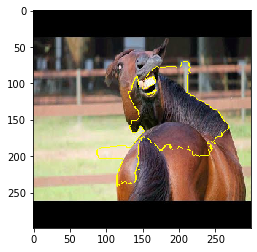

In [40]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

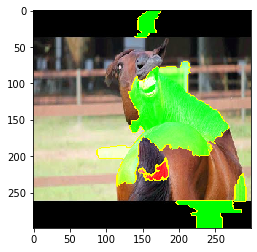

In [39]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Example 3

('n02403003', 'ox', 0.25289255)
('n02422106', 'hartebeest', 0.22449774)
('n02408429', 'water_buffalo', 0.15598404)
('n02437312', 'Arabian_camel', 0.041800022)
('n02504013', 'Indian_elephant', 0.031252507)


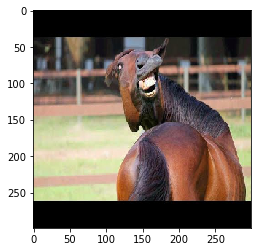

In [36]:
images = transform_img_fn([os.path.join('data','horse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = pretrained_inception.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [41]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], pretrained_inception.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 12min 26s, sys: 2min 11s, total: 14min 37s
Wall time: 2min 32s


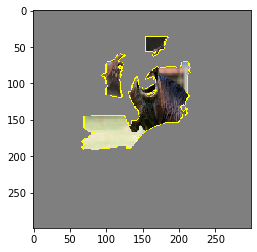

In [42]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

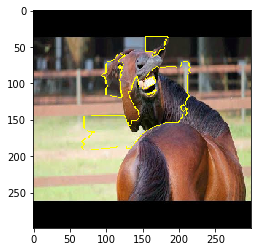

In [43]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

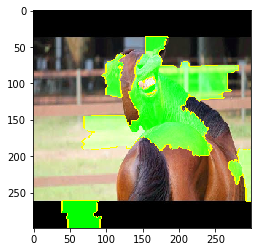

In [44]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

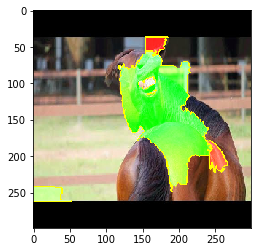

In [45]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[4], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

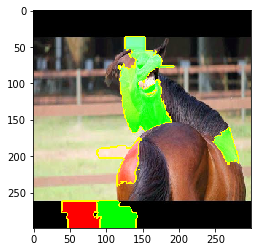

In [46]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[3], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))